### Housing Price Estimation

Here, we will train a machine learning model to predict housing price based on its total area (in sq ft). We will use univariate linear regression to train the model.
- **Feature**: Area of house (measured in square foot)
- **Target**: Price of the house (in $)

The feature values will be normalized using `z-score normalization`.
We will follow the `90-10` rule for segregating the dataset into training and validation sets i.e., 90% of the data will be used for training the model and 10% of the dataset will be used for validating the trained model.

**Note:** Model has been trained with L2-regularization to avoid overfitting.

In [46]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from models import LinearRegression
from utils import Normalization

In [47]:
def process_data():
    df = pd.read_csv('./datasets/housing.csv')
    total_rows = df.shape[0]
    train_rows = math.ceil(0.9 * total_rows)
    training_set = df[:train_rows]
    validation_set = df[train_rows:]
    print(f"There are {training_set.shape[0]} row(s) in the training set.")
    print(f"There are {validation_set.shape[0]} row(s) in the validation set.")

    x_tr = training_set['area'].to_numpy(dtype=float)
    x_tr = np.reshape(x_tr, (x_tr.shape[0], 1))
    x_tr = Normalization.zscore(x_tr)
    z_tr = np.ones((x_tr.shape[0], 1), dtype=float)
    x_tr = np.concatenate((z_tr, x_tr), axis=1)
    y_tr = training_set['price'].to_numpy(dtype=float)
    y_tr = np.reshape(y_tr, (y_tr.shape[0], 1))

    x_val = validation_set['area'].to_numpy(dtype=float)
    x_val = np.reshape(x_val, (x_val.shape[0], 1))
    x_val = Normalization.zscore(x_val)
    z_val = np.ones((x_val.shape[0], 1), dtype=float)
    x_val = np.concatenate((z_val, x_val), axis=1)
    y_val = validation_set['price'].to_numpy(dtype=float)
    y_val = np.reshape(y_val, (y_val.shape[0], 1))

    return x_tr, y_tr, x_val, y_val

There are 491 row(s) in the training set.
There are 54 row(s) in the validation set.


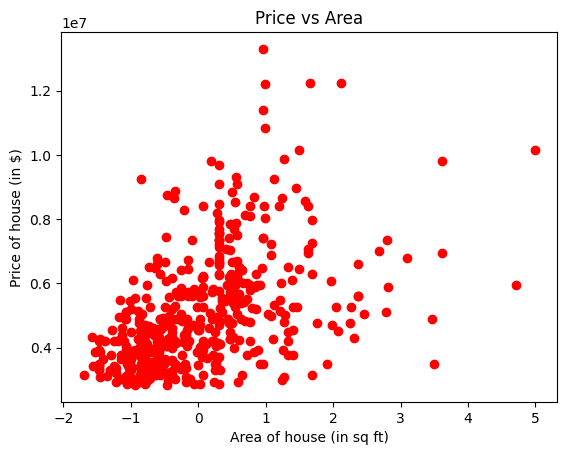

In [48]:
x_train, y_train, x_validate, y_validate = process_data()
m, n = x_train.shape

plt.plot(x_train[:,1:], y_train, 'ro')
plt.title("Price vs Area")
plt.xlabel("Area of house (in sq ft)")
plt.ylabel("Price of house (in $)")
plt.show()

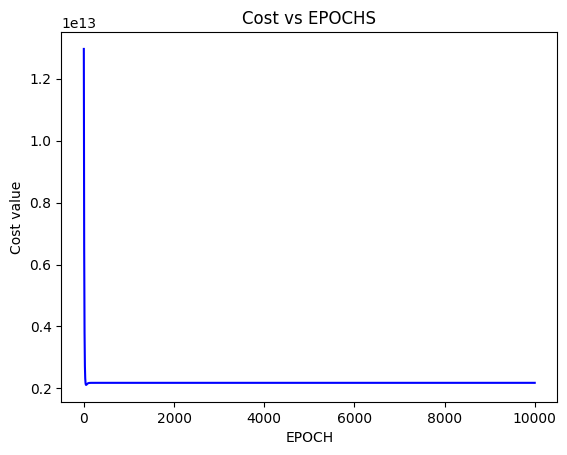

In [49]:
model_gd = LinearRegression(0.05, 10000, 0.15)
cost_values = model_gd.train_gd(x_train, y_train)

plt.plot(cost_values, 'b')
plt.title("Cost vs EPOCHS")
plt.xlabel("EPOCH")
plt.ylabel("Cost value")
plt.show()

In [50]:
model_ols = LinearRegression()
model_ols.train_ols(x_train, y_train)

print(f"Model parameters for gradient descent: w = {model_gd.w_final} | Minimum cost value = {model_gd.cost_final:,}")
print(f"Model parameters for OLS: w = {model_ols.w_final} | Minimum cost value = {model_ols.cost_final:,}")


Model parameters for gradient descent: w = [[4678900.38766572]
 [ 813071.94346705]] | Minimum cost value = 2,112,127,013,283.9458
Model parameters for OLS: w = [[5029285.72301426]
 [ 873959.85456168]] | Minimum cost value = 1,203,143,596,950.8699


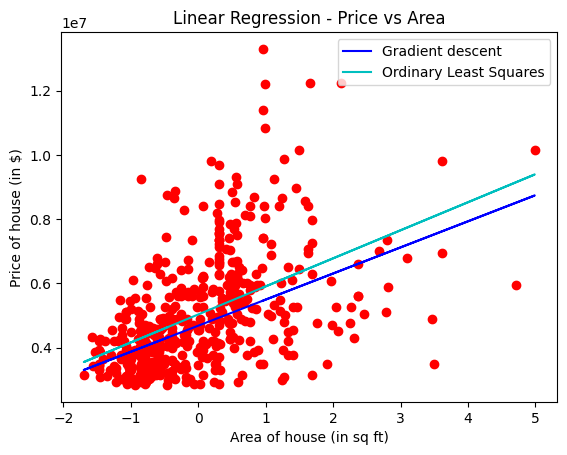

In [51]:
y_pred_hat_gd = model_gd.predict(x_train)
y_pred_hat_ols = model_ols.predict(x_train)

plt.plot(x_train[:,1:], y_train, 'ro')
plt.plot(x_train[:,1:], y_pred_hat_gd, 'b', label='Gradient descent')
plt.plot(x_train[:,1:], y_pred_hat_ols, 'c', label='Ordinary Least Squares')
plt.title("Linear Regression - Price vs Area")
plt.xlabel("Area of house (in sq ft)")
plt.ylabel("Price of house (in $)")
plt.legend()
plt.show()

In [52]:
r2_gd = model_gd.r2_score(x_train, y_train)
r2_ols = model_ols.r2_score(x_train, y_train)
print(f"R2 scores for Gradient descent: {r2_gd:.2f} and OLS: {r2_ols:.2f}")

r2_gd_val = model_gd.r2_score(x_validate, y_validate)
r2_ols_val = model_ols.r2_score(x_validate, y_validate)
print(f"Validation R2 scores for Gradient descent: {r2_gd_val:.2f} and OLS: {r2_ols_val:.2f}")

R2 scores for Gradient descent: 0.20 and OLS: 0.24
Validation R2 scores for Gradient descent: -62.14 and OLS: -81.58
